In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def update_weights(X,W):
    for x in X:
        W += np.outer(x,x)
    for i in range(W.shape[0]):
        W[i,i] = 0
    return W

def recall(x,W):
    
    x = x.reshape((-1,1))
    #print(x)
    #print(W.shape)
    #x = np.sign(np.matmul(W.T,x))
    
    for i in range(x.shape[0]):
        x[i] = np.sign(np.dot(x.T,W[i,:]))
    return x


def find_pattern(x, W, epochs):
    for i in range(epochs):
        x = recall(x,W)
    return x

def calculate_energy(x,W):
    E_s = np.zeros(W.shape[0])
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            E_s[i] = E_s[i] + W[i,j]*x[i]*x[j]
    E = - np.sum(E_s)
    return E

(11264,)
(11, 1024)
(3, 1024)
[-1 -1 -1 ... -1 -1 -1]
0.0  procent noise.
9.9  procent noise.
19.9  procent noise.
29.9  procent noise.
39.9  procent noise.
49.9  procent noise.
59.9  procent noise.
69.9  procent noise.
79.9  procent noise.
89.9  procent noise.


/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


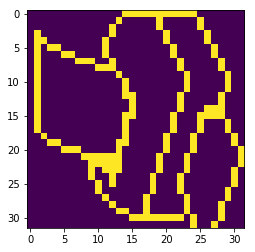

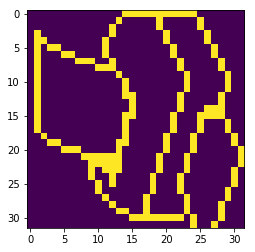

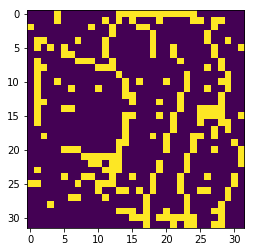

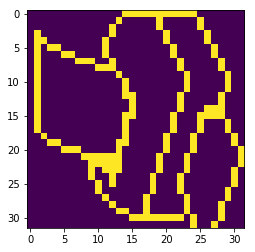

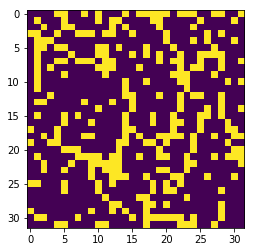

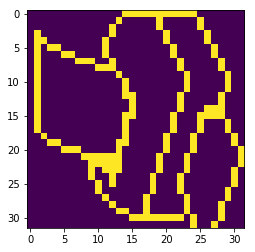

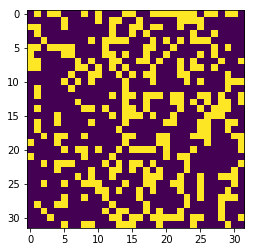

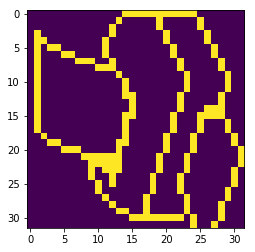

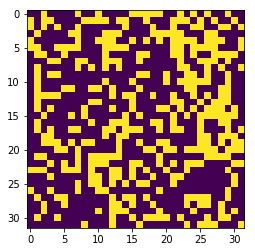

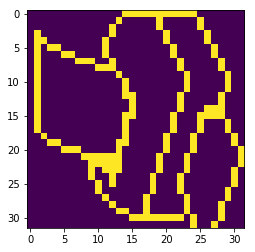

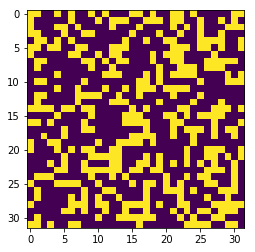

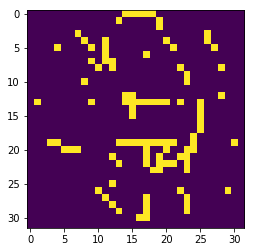

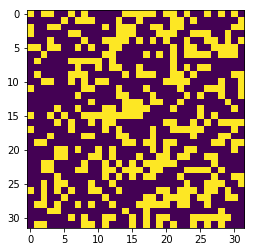

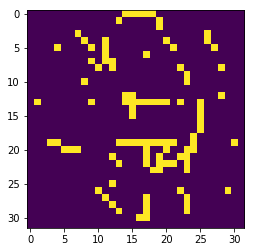

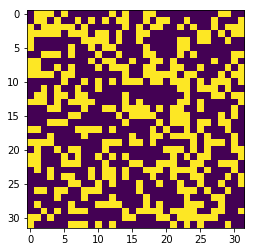

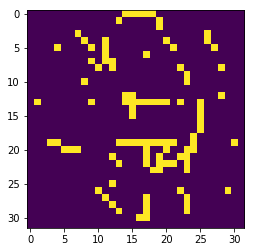

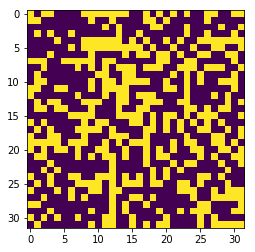

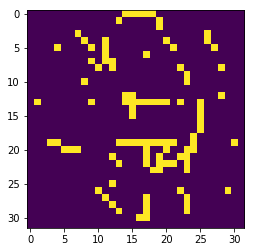

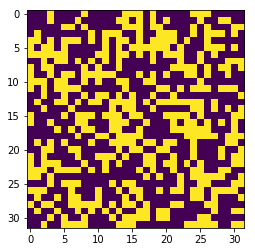

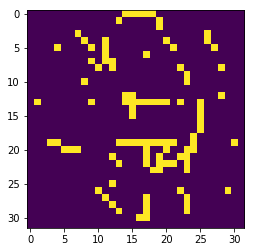

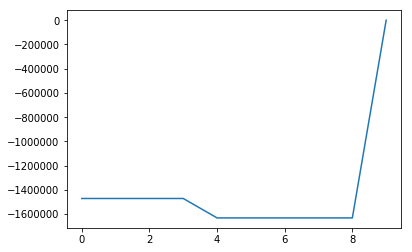

In [25]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
print(data.shape)
data = data.reshape(-1,1024)
print(data.shape)
#to start with learn the first three
train_X = data[0:3].copy()
print(train_X.shape)
print(data[0])
W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)

x = data[0]

#print(x)
epochs = 10
energy_s = np.zeros(10)
for i in range(0,1000,100):
    for i in range(i):
        index = np.random.randint(0,x.shape[0])
        x[index] = -x[index]
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    x = find_pattern(x,W,epochs)
    print(i/10," procent noise.")
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    E = calculate_energy(x,W)
    energy_s[int(i/100)] = E
plt.figure()
plt.plot(np.arange(10),energy_s)

Inte helt tydligt var gränsen går men runt 250st kan vi shifta tecken på och fortfarande få ut bilden.

0.0  procent noise.
9.9  procent noise.
19.9  procent noise.
29.9  procent noise.
39.9  procent noise.
49.9  procent noise.
59.9  procent noise.
69.9  procent noise.
79.9  procent noise.
89.9  procent noise.


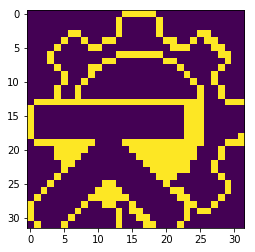

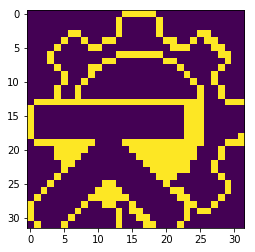

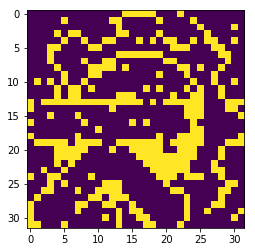

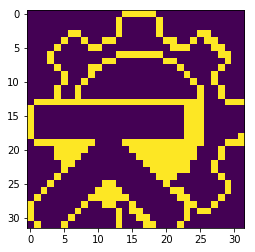

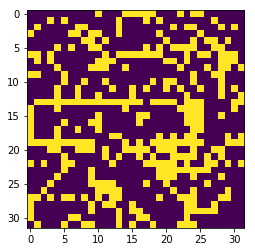

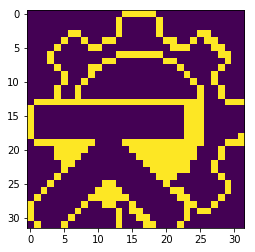

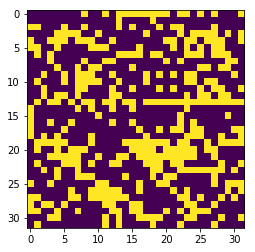

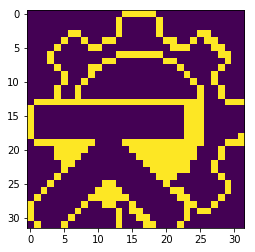

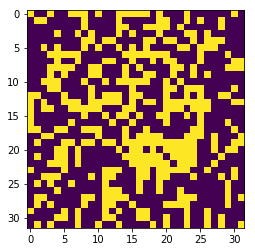

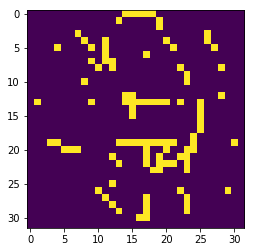

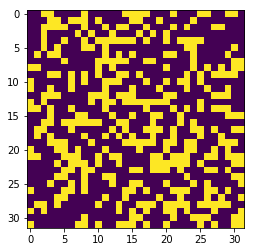

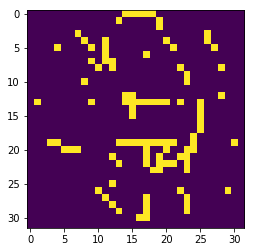

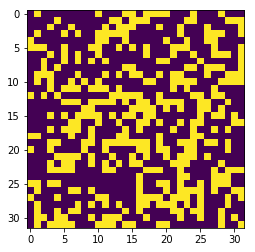

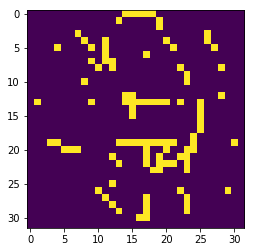

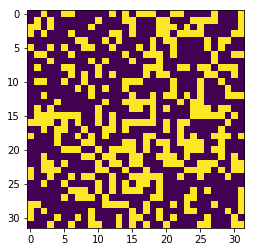

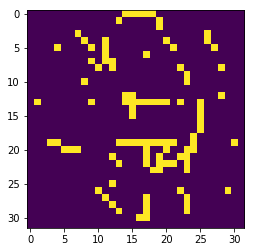

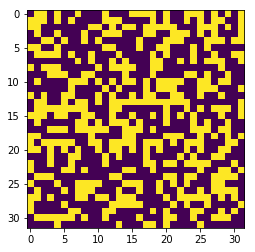

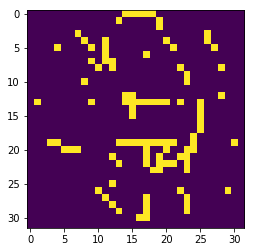

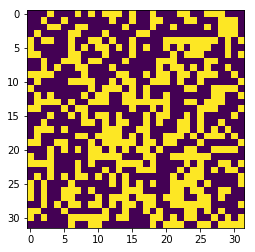

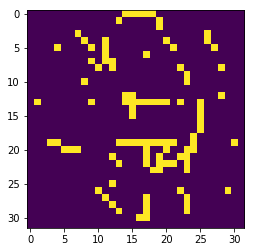

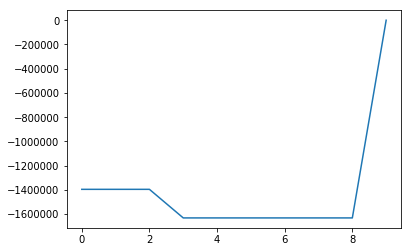

In [26]:
x = data[1]

#print(x)
epochs = 10
energy_s = np.zeros(10)
for i in range(0,1000,100):
    for i in range(i):
        index = np.random.randint(0,x.shape[0])
        x[index] = -x[index]
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    x = find_pattern(x,W,epochs)
    print(i/10," procent noise.")
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    E = calculate_energy(x,W)
    energy_s[int(i/100)] = E
plt.figure()
plt.plot(np.arange(10),energy_s)

0.0  procent noise.
9.9  procent noise.
19.9  procent noise.
29.9  procent noise.
39.9  procent noise.
49.9  procent noise.
59.9  procent noise.
69.9  procent noise.
79.9  procent noise.
89.9  procent noise.


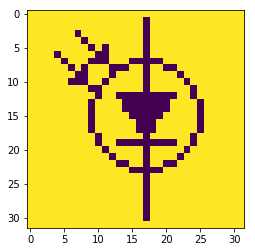

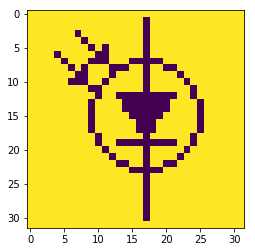

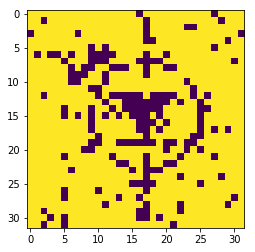

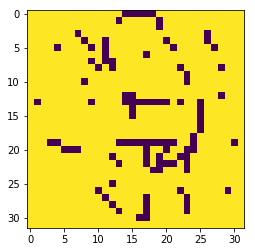

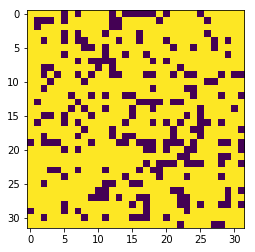

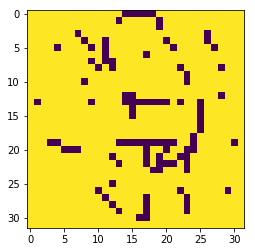

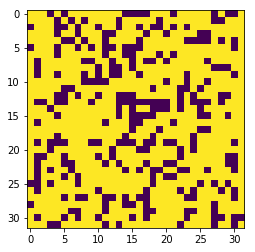

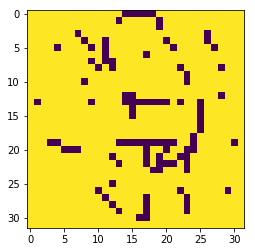

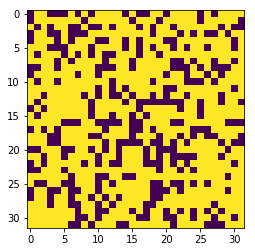

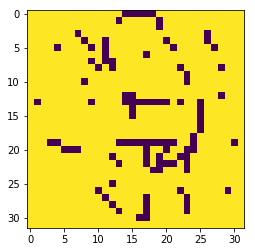

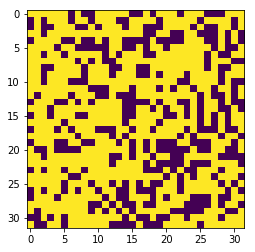

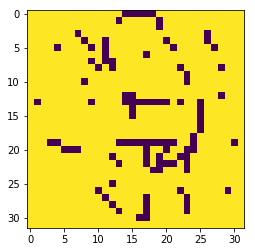

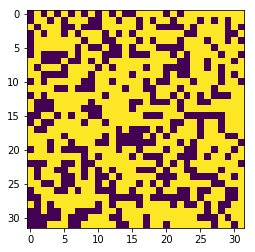

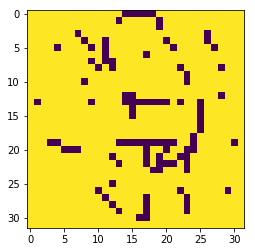

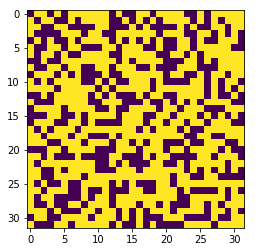

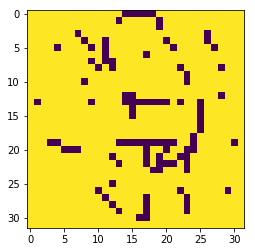

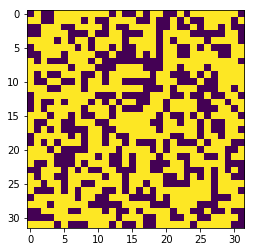

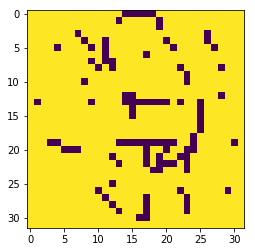

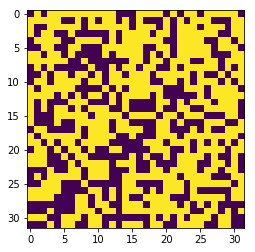

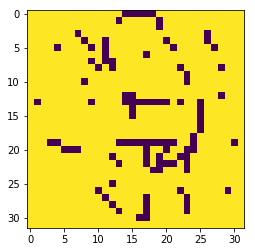

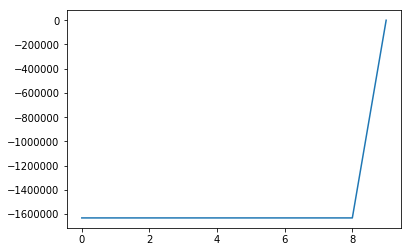

In [27]:
x = data[2]

#print(x)
epochs = 10
energy_s = np.zeros(10)
for i in range(0,1000,100):
    for i in range(i):
        index = np.random.randint(0,x.shape[0])
        x[index] = -x[index]
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    x = find_pattern(x,W,epochs)
    print(i/10," procent noise.")
    plt.figure()
    plt.imshow(x.reshape((32,32)))
    E = calculate_energy(x,W)
    energy_s[int(i/100)] = E
plt.figure()
plt.plot(np.arange(10),energy_s)

In [ ]:
Någonstans vid 20-30% noise så blir det knas för alla utom nummer tre. Den blir destroyed direkt.